# Results for the working memory dataset

In [9]:
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats as sps # to calcualte confidence intervals, etc
from adjustText import adjust_text # to adjust the text labels in the plots (pip install adjustText)

import selective_recruitment.plotting as plotting
import selective_recruitment.recruite_ana as ra
import selective_recruitment.globals as gl

from statsmodels.stats.anova import AnovaRM # perform F test

In [5]:
# setting working directory 
wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/CerebellumWorkingMemory/selective_recruit'

## 1. Plots and test results
Scatterplot using regression

### 1.1 Over the whole cerebellum and cortex

Prepare data and run regression 
This way the functions are universal across projects, and it transparent where 
the files / ROIs come from and how the tsv-file is produced. 

Given that get_summary and run_regress are shared basic functions, 
the loading saving of files is done outside of the functions - makes things clearer

In [3]:
D = ra.get_summary(dataset = "WMFS", 
                ses_id = 'ses-02', 
                type = "CondAll", 
                cerebellum_roi = None, 
                cortex_roi = None,
                add_rest = True)
D = ra.run_regress(D,fit_intercept=True)
D.to_csv(wkdir + '/ROI_all.tsv',sep='\t')


In [7]:
# Generate the labels and colors for all scatterplot
label_dict={1:'Enc2F', 2:'Ret2F',
            3:'Enc2B', 4:'Ret2B',
            5:'Enc4F', 6:'Ret4F',
            7:'Enc4B', 8:'Ret4B',
            9:'Enc6F', 10:'Ret6F',
            11:'Enc6B',12:'Ret6B',
            13:'rest'}
marker_dict = {1:'o',2:'X',
                3:'o',4:'X',
                5:'o',6:'X',
                7:'o',8:'X',
                9:'o',10:'X',
                11:'o',12:'X',
                13:'s'}
color_dict  = {1:'b',2:'b',
                3:'r',4:'r',
                5:'b',6:'b',
                7:'r',8:'r',
                9:'b',10:'b',
                11:'r',12:'r',
                13:'g'}



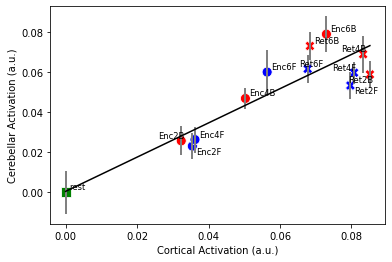

In [17]:
df_path = os.path.join(wkdir, "ROI_all.tsv")
df1 = pd.read_csv(df_path, sep="\t")
plotting.make_scatterplot2(df1,split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict)

Figure 1. Scatterplot showing average cerebellar activation in each condition vs the corresponding average activation in the cortex. The linear fit is shown in grey. Error bars represent the 95% confidence interval on the residuals of the linear regression fit (within each subject). 

<font color = 'grey'> Do F-test (repeated measures ANOVA)

In [19]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
cond_name  6.6611 11.0000 165.0000 0.0000



### 1.2 Over region of interests
#### 1.2.1 verbal working memory contrast

<font color = 'grey'>Prepare the dataframe for the scatterplot

In [20]:
D = ra.get_summary(dataset = "WMFS", 
                ses_id = 'ses-02', 
                type = "CondAll", 
                cerebellum_roi ='tpl-SUIT/atl-Verbal2Back_space-SUIT', 
                cortex_roi = "tpl-fs32k/Verbal2Back.32k",
                add_rest = True)
D = ra.run_regress(D,fit_intercept=True)
D.to_csv(wkdir + '/ROI_Verbal2Back.tsv',sep='\t')

In [21]:
df_path = os.path.join(wkdir, "ROI_Verbal2Back.tsv")
df2 = pd.read_csv(df_path, sep="\t")

<font color = 'grey'> Do the scatterplot:<br>

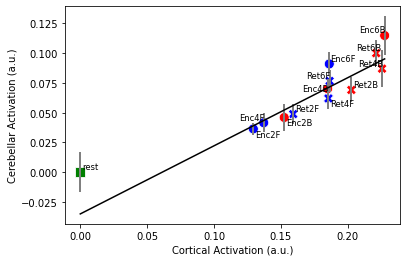

In [22]:
plotting.make_scatterplot2(df2,split='cond_num',
            labels=label_dict,
            markers=marker_dict,
            colors=color_dict)

Figure 2.

<font color = 'grey'> Do F-test (repeated measures ANOVA)

In [23]:
print(AnovaRM(data=df2[df2.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
cond_name  2.4204 11.0000 165.0000 0.0081



### 1.3 Using connectivity models

<font color = 'grey'> Model trained on MDTB, tested on MDTB:<br>

In [29]:
# load the dataframe for the whole 
df_path = os.path.join(conn_dir, "WMFS", "sc_conn_MDTB_WMFS_ses-02_Verbal2Back.tsv")
df = pd.read_csv(df_path, sep="\t")

# cleaning up dataframe
df["phase"] = df["phase"].map({0:'encode', 1:'retriev'})
df["load"] = df["load"].map({2:'load2', 4:'load4', 6:'load6'})
df["recall"] = df["recall"].map({1:"forward", 0:"backward"})

# prepare df for plotting
# by setting non-numeric fields to 'first', we make sure that they are not removed from the final dataframe
agg_kw= {'load': 'first', 'recall':'first', 'phase': 'first', 'cond_name':'first', 'X': np.mean, 'Y': np.mean, 'res': np.mean}
df_preped = plotting.prep_df(df, groupby = "cond_name", agg_kw=agg_kw)


# print(np.sum(df['res']))

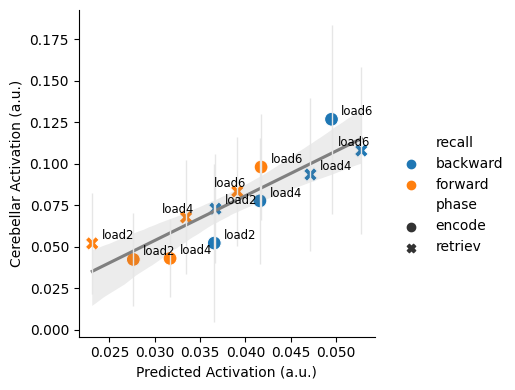

In [30]:
plotting.make_scatterplot(df_preped, hue = "recall", style="phase", label = 'load', height = 4, aspect = 1)
plt.xlabel("Predicted Activation (a.u.)")
plt.savefig("SC_demand_conn_VWM.svg")

In [31]:
print(AnovaRM(data=df, depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
cond_name  1.4400 11.0000 165.0000 0.1594

